# ML Answers

- **Answer Set**: No. 02
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [19]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

import xgboost as skxgb
import sklearn.svm as sksvm
import sklearn.tree as sktree
import sklearn.ensemble as skensemble
import sklearn.decomposition as skpca

import torch as torch
import skorch as skorch

import sklearn.base as skbase
import sklearn.utils as skutils
import sklearn.metrics as skmetrics
import sklearn.pipeline as skpipeline
import sklearn.preprocessing as skprocessing
import sklearn.model_selection as skselection

sk.set_config(display="diagram")

### Dataset

Now we can load our dataset:

In [20]:
data_frame = pd.read_csv("../lib/pd_speech_features.csv", skiprows=1)
data_frame = skutils.shuffle(data_frame)

data_label = data_frame["class"]
data_frame = data_frame.drop(["id", "class"], axis=1)

data_features = data_frame.to_numpy()
data_labels = data_label.to_numpy()

data_labels = np.array(data_labels, dtype=np.int32)

train_features, test_features, train_labels, test_labels = skselection.train_test_split(
    data_features, 
    data_labels, 
    test_size=0.3, 
    random_state=313
)

train_features = np.array(train_features, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.int64)
test_features = np.array(test_features, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.int64)

data_frame

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
279,1,0.83201,0.73877,0.34552,367,366,0.005252,0.000068,0.00137,0.000007,...,13.4652,5.5516,6.2456,4.2303,4.2632,5.2771,4.1260,6.1704,3.4549,4.2993
205,0,0.79017,0.83764,0.38590,396,395,0.004873,0.000063,0.00203,0.000010,...,64.4605,15.6964,11.1043,6.3211,4.2553,5.5202,6.7079,6.0683,4.1864,4.5830
566,0,0.70465,0.74166,0.47213,408,407,0.004725,0.000126,0.00201,0.000010,...,53.4775,39.9994,51.7277,70.5846,57.5992,41.0767,48.2282,54.9032,50.1678,93.1171
596,1,0.28655,0.71487,0.66827,285,284,0.006777,0.000047,0.00132,0.000009,...,3.2001,3.2389,3.1553,3.1826,3.2964,2.8225,2.4935,2.7494,2.6731,3.0558
194,1,0.76203,0.78088,0.56929,262,261,0.007351,0.000077,0.00197,0.000015,...,3.1804,5.0109,36.6920,33.9693,22.7633,10.0919,12.0455,32.5908,33.8833,90.3304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,1,0.83110,0.67512,0.42389,347,346,0.005557,0.001413,0.00313,0.000017,...,2.0483,3.5398,3.4060,2.5200,2.2957,2.6990,3.2788,3.0250,2.8945,2.7425
504,0,0.38927,0.73284,0.68941,196,195,0.009843,0.000260,0.00487,0.000048,...,2.9204,58.9485,59.7702,68.1092,70.4345,74.6148,64.7489,51.1687,44.1420,95.0850
20,1,0.82169,0.62901,0.36176,292,291,0.006624,0.000028,0.00084,0.000006,...,1.6695,3.5319,6.9929,4.2227,2.9734,3.4577,3.0598,2.7662,3.1315,3.0272
682,1,0.79400,0.74376,0.67749,196,195,0.009813,0.000178,0.00482,0.000047,...,2.2386,2.1029,2.1280,3.2803,6.7456,3.3846,3.7920,6.4522,6.8683,23.7145


---

## Problem

In this problem, we are going to fit seven types of models, before training each model, we will do a `Grid Search` with `Cross Validation` to find the best hyper parameters for the model.

### Decision Tree

In [21]:
decision_tree_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", sktree.DecisionTreeClassifier())
    ]),
    param_grid={
        "classifier__criterion": ["gini", "entropy"],
        "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

decision_tree_predicts = decision_tree_model.predict(test_features)

decision_tree_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 50, 100, None]},
             scoring='accuracy')

### Random Forest

In [22]:
random_forest_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", skensemble.RandomForestClassifier())
    ]),
    param_grid={
        "classifier__criterion": ["gini", "entropy"],
        "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

random_forest_predicts = random_forest_model.predict(test_features)

random_forest_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 50, 100, None]},
             scoring='accuracy')

### XGBoost

In [23]:
skxgb.set_config(verbosity=0)

xgboost_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", skxgb.XGBClassifier(use_label_encoder=False))
    ]),
    param_grid={},
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

xgboost_predicts = xgboost_model.predict(test_features)

xgboost_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      use_label_encoder=False,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-1, param_grid={}, scoring='accuracy')

### SVM

In [24]:
svm_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", sksvm.SVC())
    ]),
    param_grid={
        "classifier__C": [0.5, 1, 10, 100],
        "classifier__kernel": ["linear", "poly", "rbf", "sigmoid"],
        "classifier__gamma": ["scale", 1, 0.1, 0.01, 0.001, 0.0001]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

svm_predicts = svm_model.predict(test_features)

svm_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.5, 1, 10, 100],
                         'classifier__gamma': ['scale', 1, 0.1, 0.01, 0.001,
                                               0.0001],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid']},
             scoring='accuracy')

### MLP

In [25]:
class MLP(torch.nn.Module):
    def __init__(self, layers):
        super().__init__()
        torch_layers = []
        input_layers = 753

        for layer in layers:
            torch_layers.append(torch.nn.Linear(input_layers, layer))
            torch_layers.append(torch.nn.ReLU())
            input_layers = layer
        
        torch_layers.append(torch.nn.Linear(input_layers, 2))
        torch_layers.append(torch.nn.Softmax(dim=-1))

        self.layers = torch.nn.Sequential(*torch_layers)
    
    def forward(self, X):
        return self.layers(X)

mlp_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", skorch.NeuralNetClassifier(MLP, verbose=False))
    ]),
    param_grid={
        "classifier__module__layers": [(10,), (20,), (50,), (100, 10)],
        "classifier__lr": [0.1, 0.01],
        "classifier__max_epochs": [50],
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

mlp_predicts = mlp_model.predict(test_features)

mlp_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier',
                                        <class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.MLP'>,
))]),
             n_jobs=-1,
             param_grid={'classifier__lr': [0.1, 0.01],
                         'classifier__max_epochs': [50],
                         'classifier__module__layers': [(10,), (20,), (50,),
                                                        (100, 10)]},
             scoring='accuracy')

### ELM

In [26]:
class ELMClassifier(skbase.BaseEstimator, skbase.ClassifierMixin):
    def __init__(self, hidden_size=200, activation="sigmoid"):
        self.hidden_size = hidden_size
        self.activation = activation

        self._input_size = 753
        self._hidden_size = self.hidden_size
        self._output_size = 2

        self._activation = {
            "sigmoid": lambda x: 1. / (1. + np.exp(-x)),
            "relu": lambda x: np.where(x < 0, np.zeros(x.shape), x)
        }[self.activation]

        self._beta = np.random.uniform(-1., 1., size=(self._hidden_size, self._output_size))
        self._w = np.random.uniform(-1, 1, size=(self._input_size, self._hidden_size))
        self._bias = np.zeros(shape=(self._hidden_size,))

    def fit(self, X, y):
        H = self._activation(X @ self._w + self._bias)
        H_pinv = np.linalg.pinv(H)
        self._beta = H_pinv @ np.eye(np.max(y) + 1)[y]

    def predict(self, X):
        H = self._activation(X @ self._w + self._bias)
        return np.argmax(H @ self._beta, axis=-1)

    def predict_proba(self, X):
        pass

elm_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", ELMClassifier())
    ]),
    param_grid={
        "classifier__hidden_size": [200, 500, 1000, 5000, 10000, 50000],
        "classifier__activation": ["sigmoid", "relu"],
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

elm_predicts = elm_model.predict(test_features)

elm_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier', ELMClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__activation': ['sigmoid', 'relu'],
                         'classifier__hidden_size': [200, 500, 1000, 5000,
                                                     10000, 50000]},
             scoring='accuracy')

### AutoEncoder

In [27]:
class AutoEncoder(torch.nn.Module):
    def __init__(self, layers):
        super().__init__()
        encoder_layers = []
        decoder_layers = []
        input_layers = 753

        for layer in layers:
            encoder_layers.insert(-1, torch.nn.ReLU())
            encoder_layers.insert(-1, torch.nn.Linear(input_layers, layer))
            decoder_layers.insert(0, torch.nn.ReLU())
            decoder_layers.insert(0, torch.nn.Linear(layer, input_layers))
            input_layers = layer

        self.encoder = torch.nn.Sequential(*encoder_layers)
        self.decoder = torch.nn.Sequential(*decoder_layers)
    
    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return (encoded, decoded)

class NeuralNetTransformer(skorch.NeuralNet, skbase.TransformerMixin):
    def get_loss(self, y_pred, y_true, X, **kwargs):
        (_, decoded) = y_pred
        return super().get_loss(decoded, y_true=X, X=X, **kwargs)
    
    def transform(self, X):
        (encoded, _) = self.forward(X)
        return encoded

auto_encoder_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("autoencoder", NeuralNetTransformer(AutoEncoder, criterion=torch.nn.MSELoss, verbose=False)),
        ("classifier", skensemble.RandomForestClassifier())
    ]),
    param_grid={
        "autoencoder__module__layers": [(10,), (20,), (50,)],
        "autoencoder__lr": [0.1, 0.01],
        "autoencoder__max_epochs": [50],
        "classifier__criterion": ["gini", "entropy"],
        "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

auto_encoder_predicts = auto_encoder_model.predict(test_features)

auto_encoder_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('autoencoder',
                                        <class '__main__.NeuralNetTransformer'>[uninitialized](
  module=<class '__main__.AutoEncoder'>,
)),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'autoencoder__lr': [0.1, 0.01],
                         'autoencoder__max_epochs': [50],
                         'autoencoder__module__layers': [(10,), (20,), (50,)],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 50, 100, None]},
             scoring='accuracy')

### Results

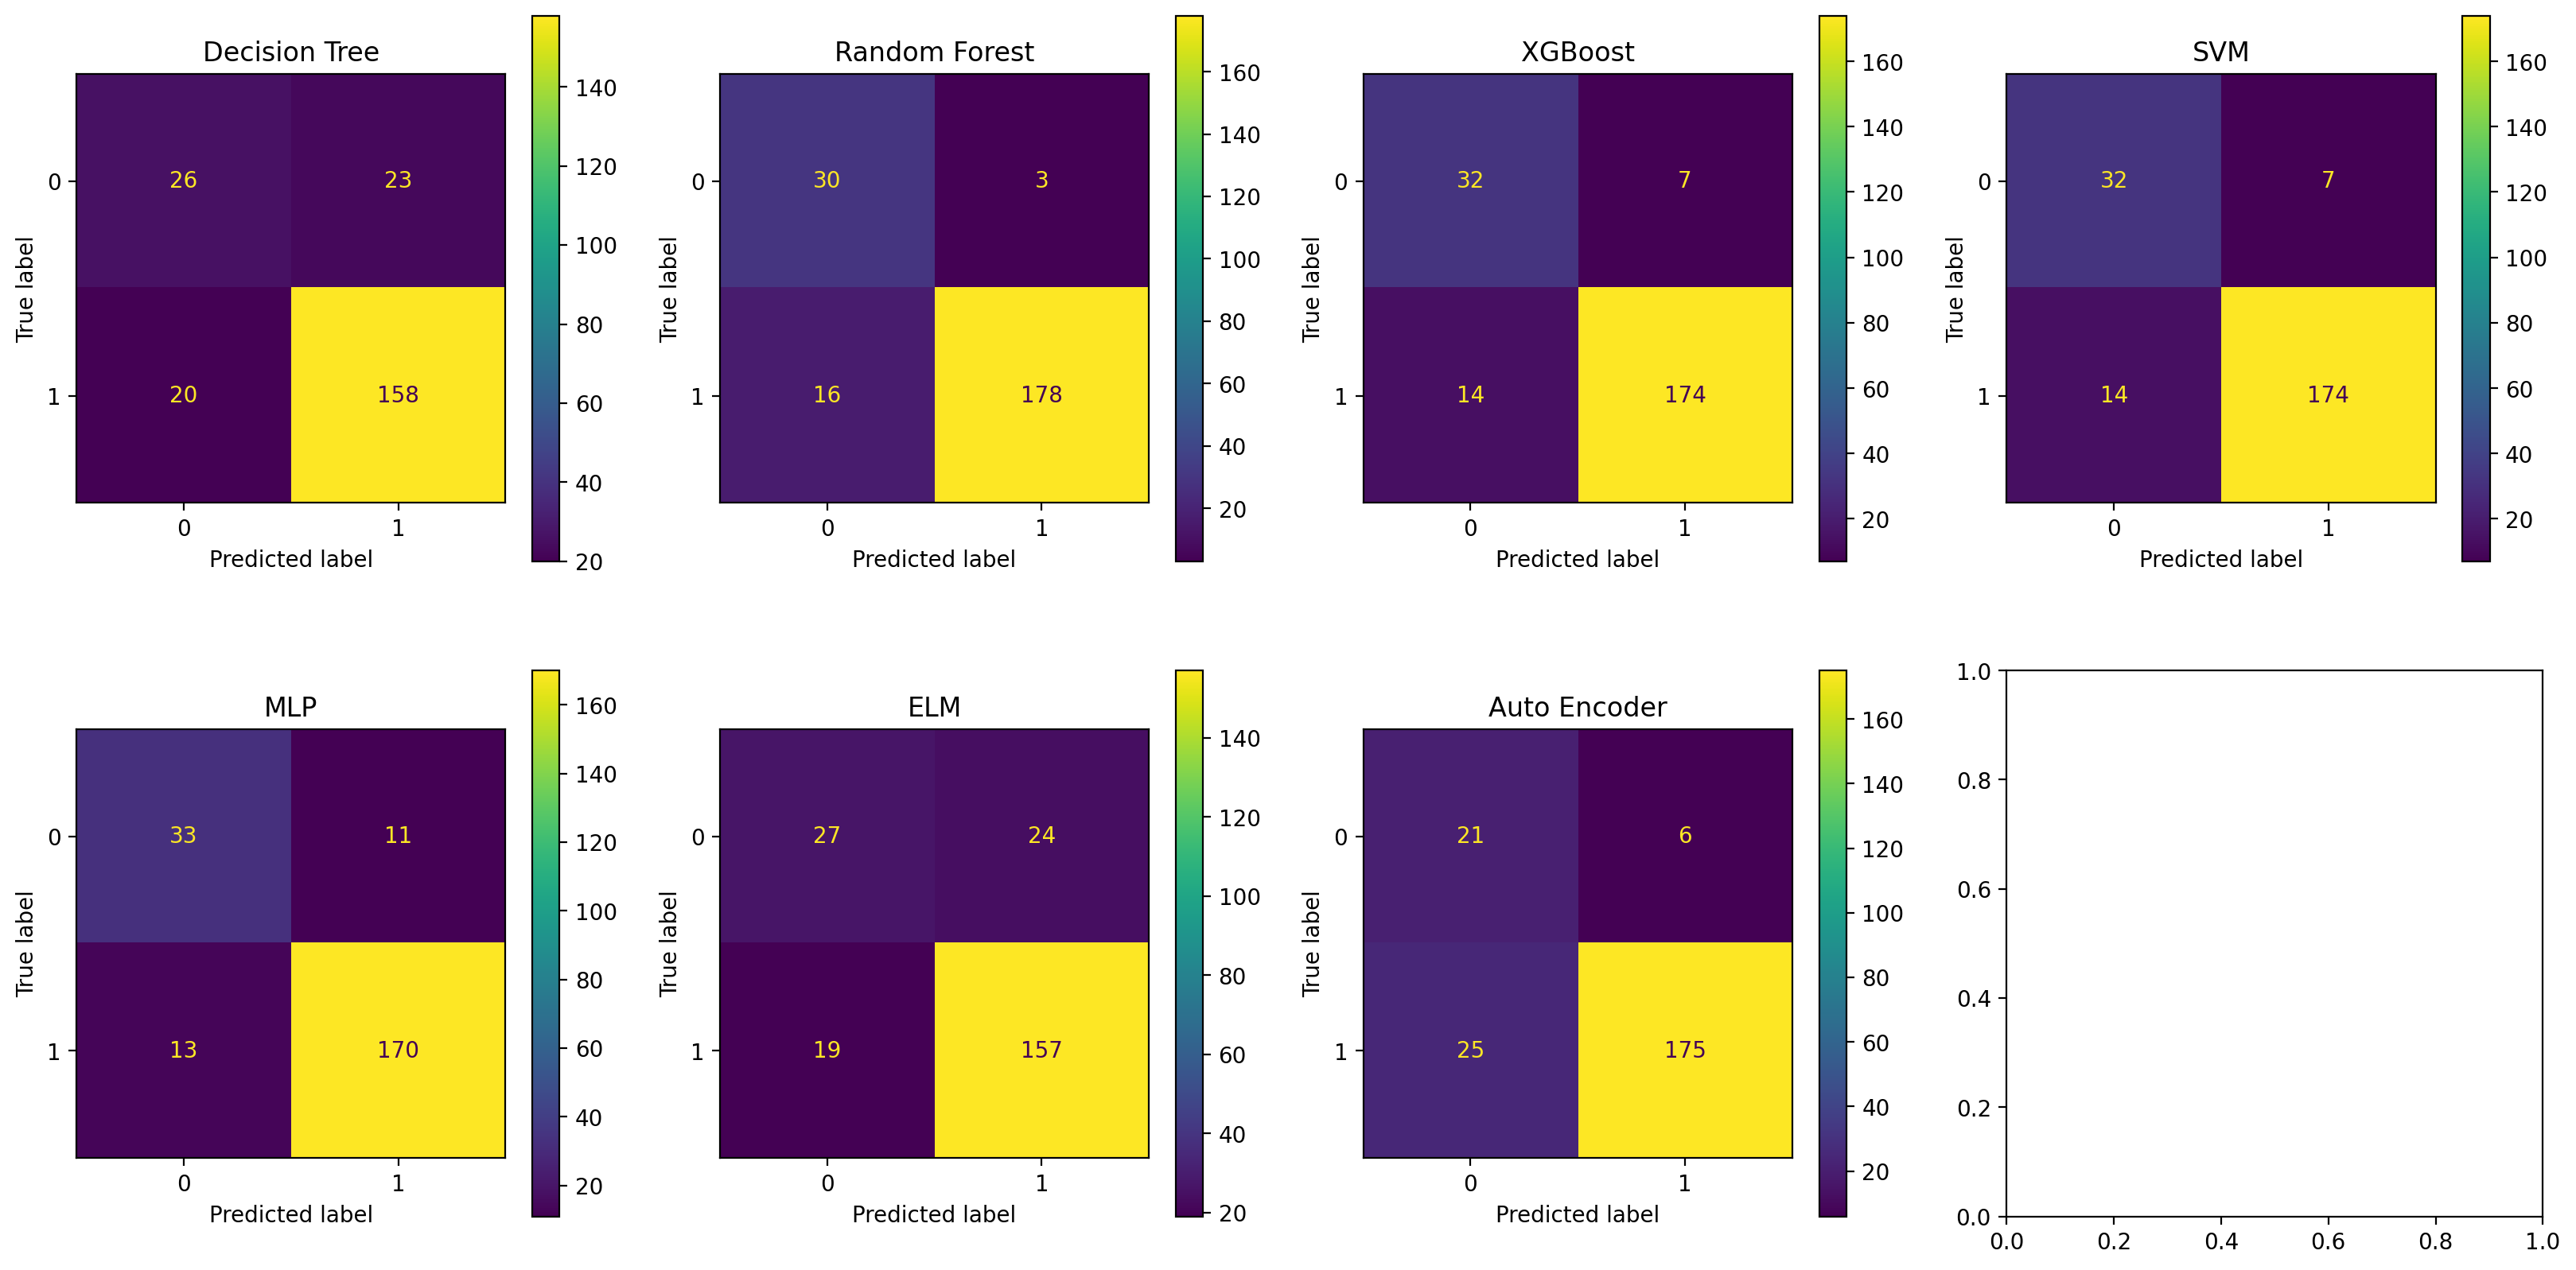

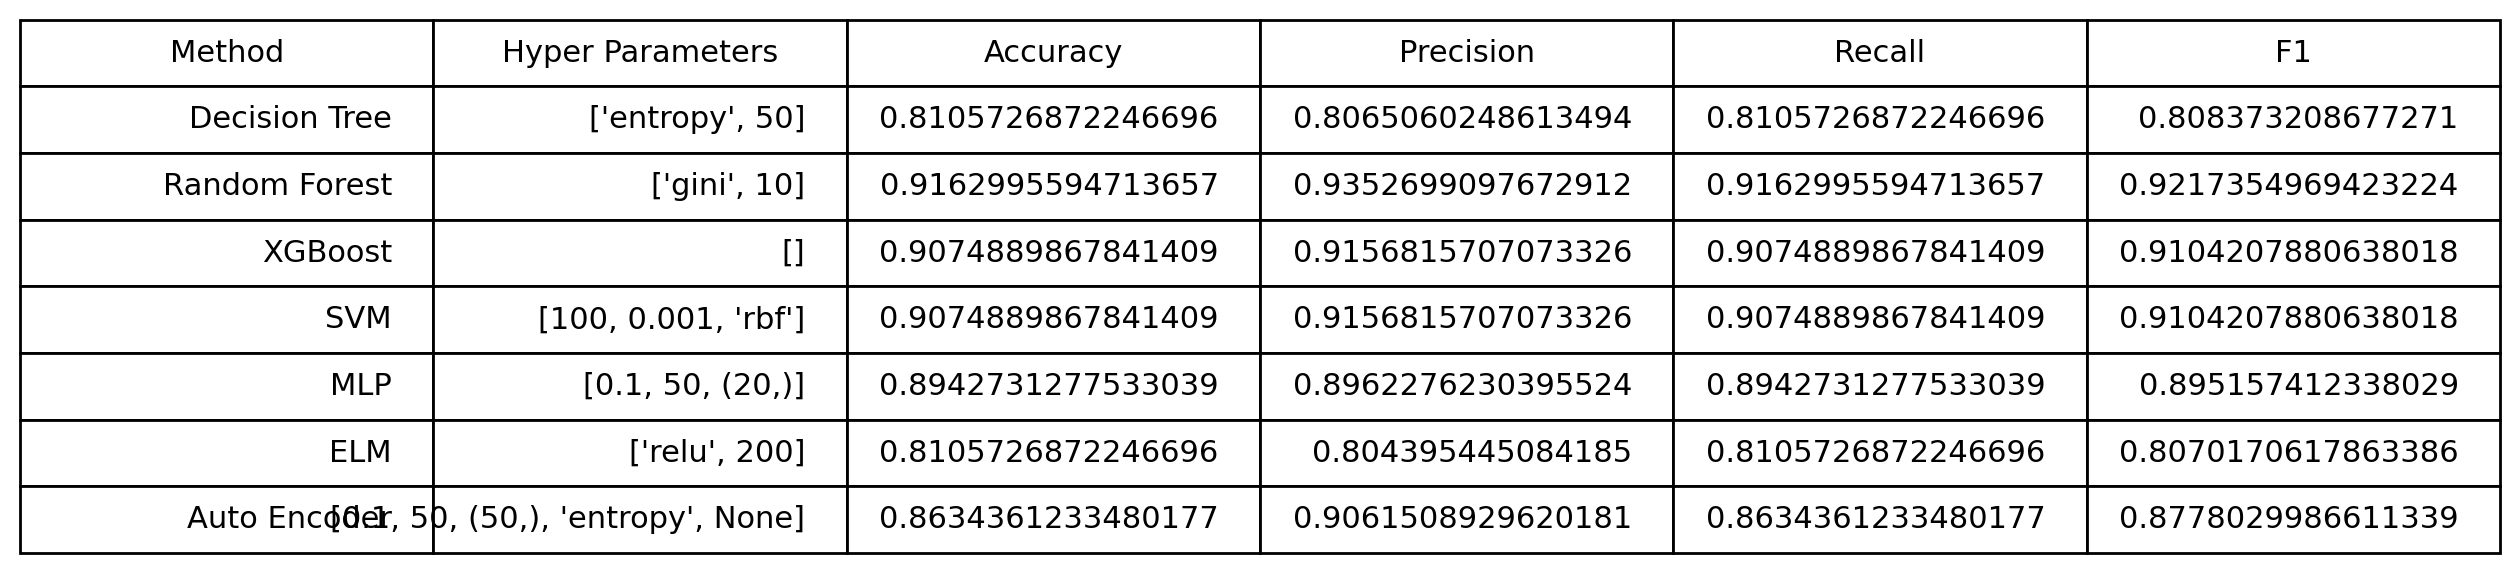

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10), dpi=200)
axes = axes.flatten()

axes[0].set_title("Decision Tree")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    decision_tree_predicts,
    test_labels,
    ax=axes[0]
)

axes[1].set_title("Random Forest")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    random_forest_predicts,
    test_labels,
    ax=axes[1]
)

axes[2].set_title("XGBoost")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    xgboost_predicts,
    test_labels,
    ax=axes[2]
)

axes[3].set_title("SVM")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    svm_predicts,
    test_labels,
    ax=axes[3]
)

axes[4].set_title("MLP")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    mlp_predicts,
    test_labels,
    ax=axes[4]
)

axes[5].set_title("ELM")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    elm_predicts,
    test_labels,
    ax=axes[5]
)

axes[6].set_title("Auto Encoder")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    auto_encoder_predicts,
    test_labels,
    ax=axes[6]
)

plt.show()

plt.figure(figsize=(8, 1), dpi=200)
table = plt.table(cellText=[
    [
        "Decision Tree",
        list(decision_tree_model.best_params_.values()),
        skmetrics.accuracy_score(decision_tree_predicts, test_labels),
        skmetrics.precision_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "Random Forest",
        list(random_forest_model.best_params_.values()),
        skmetrics.accuracy_score(random_forest_predicts, test_labels),
        skmetrics.precision_score(random_forest_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(random_forest_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(random_forest_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "XGBoost",
        list(xgboost_model.best_params_.values()),
        skmetrics.accuracy_score(xgboost_predicts, test_labels),
        skmetrics.precision_score(xgboost_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(xgboost_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(xgboost_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "SVM",
        list(svm_model.best_params_.values()),
        skmetrics.accuracy_score(svm_predicts, test_labels),
        skmetrics.precision_score(svm_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(svm_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(svm_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "MLP",
        list(mlp_model.best_params_.values()),
        skmetrics.accuracy_score(mlp_predicts, test_labels),
        skmetrics.precision_score(mlp_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(mlp_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(mlp_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "ELM",
        list(elm_model.best_params_.values()),
        skmetrics.accuracy_score(elm_predicts, test_labels),
        skmetrics.precision_score(elm_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(elm_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(elm_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "Auto Encoder",
        list(auto_encoder_model.best_params_.values()),
        skmetrics.accuracy_score(auto_encoder_predicts, test_labels),
        skmetrics.precision_score(auto_encoder_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(auto_encoder_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(auto_encoder_predicts, test_labels, average="weighted", zero_division=True)
    ]
], colLabels=["Method", "Hyper Parameters", "Accuracy", "Precision", "Recall", "F1"], loc="center")
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(2, 2)
plt.axis("off")
plt.show()

After a lot of tries, we can see that all model except **Decision Tree** are a good fit of the data set, data set is too small for using a **Network**, so the grid search finds a neural network with a few neurons

- **Decision Tree**: model is `good fit` with `low learning time`
- **Random Forest**: model is `good fit` with `low learning time`
- **XGBoost**: model is `very good fit` with `low learning time`
- **SVM**: model is `good fit` with `low learning time`
- **MLP**: model is `very good fit` with `low learning time`
- **ELM**: model is `good fit` with `low learning time`
- **Auto Encoder**: model is `not good fit` with `high learning time`

---